# 🧠 Robot Navigation Neural Network Training
===========================================

**Step-by-step training and visualization of the robot navigation neural network.**

## Features:
- ✅ **Distance-based perception** (Solution 3) 🎯
- ✅ **Binary perception** (backward compatible)
- ✅ **Flexible configuration**
- ✅ **Interactive visualization**

## Quick Start:
1. Edit configuration in Cell 1
2. Run cells sequentially
3. Visualize training progress
4. Analyze results


In [1]:
# 🎯 CONFIGURATION
# ================
PERCEPTION_MODE = '5x5'  # Options: '3x3' or '5x5'
USE_DISTANCE = True      # True=distance-based, False=binary

# 📦 IMPORTS
# ==========
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import torch

# Add project to path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

# Import training utilities
from scripts.train_nn import (
    load_data, prepare_data_loaders, create_model, create_trainer,
    get_predictions, calculate_metrics
)
from core.pytorch_network import load_config

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Setup complete!")
print(f"\n🎯 CONFIGURATION")
print("=" * 50)
print(f"   Perception Mode: {PERCEPTION_MODE}")
print(f"   Perception Type: {'Distance-based 🎯' if USE_DISTANCE else 'Binary'}")


✅ Setup complete!

🎯 CONFIGURATION
   Perception Mode: 5x5
   Perception Type: Distance-based 🎯


In [2]:
# 📊 LOAD DATA
# ============
config = load_config(perception_mode=PERCEPTION_MODE)
X, y, metadata, is_distance_based = load_data(PERCEPTION_MODE, USE_DISTANCE)
train_loader, val_loader, test_loader = prepare_data_loaders(X, y, config)

# Display sample data
print(f"\n📋 Sample Data:")
print(f"   Input shape: {X[0].shape}")
print(f"   Sample features: {X[0][:10]}...")
print(f"   Sample label: {y[0]}")


✅ Configuration loaded from /Users/omkar/Documents/GitHub/AI_Projects/Robot-Navigation/configs/nn_config.yaml
🎯 Updated config for 5×5 Enhanced Mode (37 features)
📂 Loading data: distance_5x5_large.npz
📂 Training data loaded from /Users/omkar/Documents/GitHub/AI_Projects/Robot-Navigation/data/raw/distance_5x5_large.npz
✅ Data loaded: 8901 samples
   Features: 37 (5x5 Distance-based 🎯)
   Environments: 1000
📊 Data splits:
   Train: 7119 samples
   Validation: 891 samples
   Test: 891 samples

📊 Data Splits:
   Train: 7119 samples
   Val: 891 samples
   Test: 891 samples

📋 Sample Data:
   Input shape: (37,)
   Sample features: [0.  0.2 0.2 0.2 0.2 0.  0.2 0.4 0.4 0.4]...
   Sample label: 1


In [3]:
# 🧠 CREATE MODEL
# ===============
model = create_model(config)
trainer = create_trainer(model, config)

print(f"\n📝 Training Configuration:")
print(f"   Epochs: {config['training']['epochs']}")
print(f"   Batch size: {config['training']['batch_size']}")
print(f"   Early stopping: {config['training']['early_stopping']['patience']} epochs")



🧠 Model Architecture:
   37 → 64 → 32 → 4
   Total parameters: 4,644
   Dropout rate: 0.2

⚙️  Trainer Configuration:
   Learning rate: 0.0005
   Device: cpu

📝 Training Configuration:
   Epochs: 200
   Batch size: 64
   Early stopping: 55 epochs


In [4]:
# 🔥 TRAIN MODEL
# ==============
print(f"🚀 Starting training...")
print("=" * 60)

history = trainer.train(
    train_loader,
    val_loader,
    epochs=config['training']['epochs'],
    early_stopping_patience=config['training']['early_stopping']['patience'],
    verbose=True
)

print(f"\n✅ Training completed!")
print(f"   Epochs trained: {len(history['train_losses'])}")
print(f"   Best validation accuracy: {max(history['val_accuracies']):.4f}")


🚀 Starting training...
🚀 Starting training on cpu
🧠 Architecture: 37 → 64 → 32 → 4
⚙️  Learning rate: 0.0005
🛡️  Dropout rate: 0.2
------------------------------------------------------------
Epoch   0: Train Loss=1.3447, Train Acc=38.74%, Val Loss=1.2712, Val Acc=58.70%
Epoch  10: Train Loss=1.0923, Train Acc=65.04%, Val Loss=1.0690, Val Acc=66.89%
Epoch  20: Train Loss=1.0321, Train Acc=71.55%, Val Loss=1.0177, Val Acc=71.94%
Epoch  30: Train Loss=1.0029, Train Acc=74.32%, Val Loss=1.0036, Val Acc=73.29%
Epoch  40: Train Loss=0.9865, Train Acc=75.99%, Val Loss=0.9950, Val Acc=74.19%
Epoch  50: Train Loss=0.9720, Train Acc=77.37%, Val Loss=0.9887, Val Acc=74.64%
Epoch  60: Train Loss=0.9599, Train Acc=78.76%, Val Loss=0.9822, Val Acc=75.53%
Epoch  70: Train Loss=0.9540, Train Acc=79.20%, Val Loss=0.9792, Val Acc=75.87%
Epoch  80: Train Loss=0.9477, Train Acc=79.42%, Val Loss=0.9802, Val Acc=75.87%
Epoch  90: Train Loss=0.9385, Train Acc=80.64%, Val Loss=0.9722, Val Acc=76.09%
Epoch 10

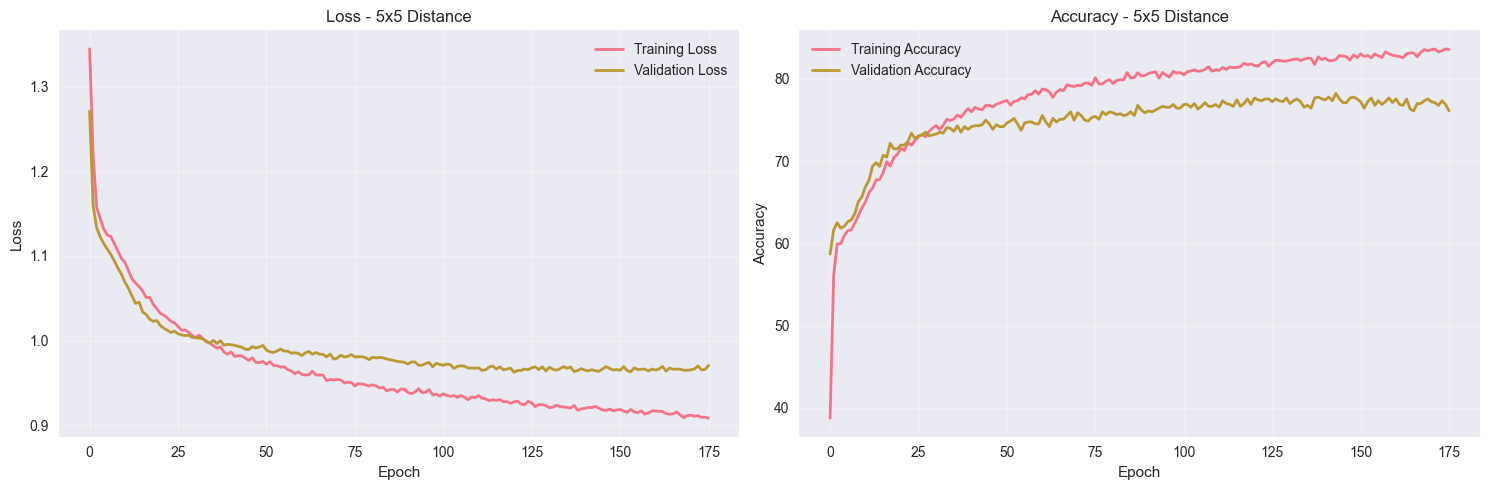


📊 Training Analysis:
   Training Accuracy: 83.5511 (8355.1%)
   Validation Accuracy: 76.0943 (7609.4%)
   Overfitting Gap: 7.4568 (745.7%)
⚠️  Warning: Significant overfitting


In [5]:
# 📈 VISUALIZE TRAINING HISTORY
# =============================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
axes[0].plot(history['train_losses'], label='Training Loss', linewidth=2)
axes[0].plot(history['val_losses'], label='Validation Loss', linewidth=2)
axes[0].set_title(f'Loss - {PERCEPTION_MODE} {"Distance" if USE_DISTANCE else "Binary"}')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy plot
axes[1].plot(history['train_accuracies'], label='Training Accuracy', linewidth=2)
axes[1].plot(history['val_accuracies'], label='Validation Accuracy', linewidth=2)
axes[1].set_title(f'Accuracy - {PERCEPTION_MODE} {"Distance" if USE_DISTANCE else "Binary"}')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print analysis
final_train_acc = history['train_accuracies'][-1]
final_val_acc = history['val_accuracies'][-1]
overfitting = final_train_acc - final_val_acc

print(f"\n📊 Training Analysis:")
print(f"   Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.1f}%)")
print(f"   Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.1f}%)")
print(f"   Overfitting Gap: {overfitting:.4f} ({overfitting*100:.1f}%)")

if overfitting > 0.1:
    print(f"⚠️  Warning: Significant overfitting")
elif overfitting > 0.05:
    print(f"✅ Acceptable: Minimal overfitting")
else:
    print(f"✅ Excellent: No overfitting")


In [6]:
# 🎯 TEST SET EVALUATION
# ======================
test_accuracy, test_loss = trainer.evaluate(test_loader)

print(f"📊 Test Set Performance:")
print(f"   Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"   Loss: {test_loss:.4f}")

# Get predictions for detailed analysis
predictions, targets = get_predictions(model, test_loader, trainer.device)
metrics = calculate_metrics(predictions, targets)

print(f"\n📋 Detailed Metrics:")
print(f"   Precision: {metrics['precision']:.4f}")
print(f"   Recall: {metrics['recall']:.4f}")
print(f"   F1-Score: {metrics['f1']:.4f}")


📊 Test Set Performance:
   Accuracy: 0.9494 (94.9%)
   Loss: 78.9001

📋 Detailed Metrics:
   Precision: 0.7935
   Recall: 0.7890
   F1-Score: 0.7882


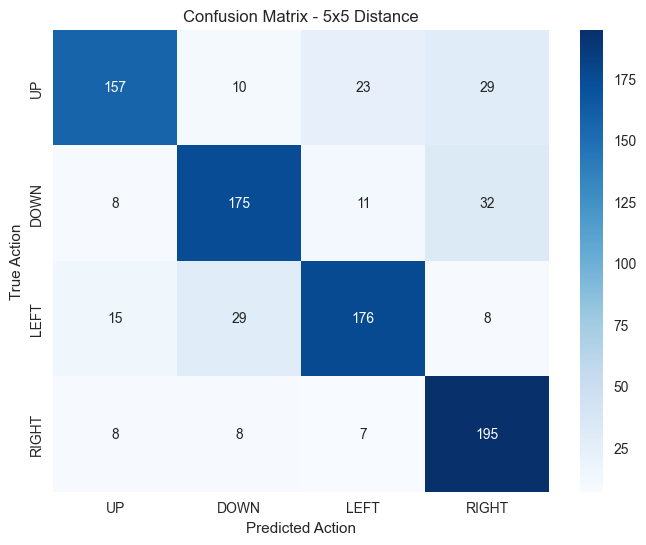


📋 Classification Report:
              precision    recall  f1-score   support

          UP       0.84      0.72      0.77       219
        DOWN       0.79      0.77      0.78       226
        LEFT       0.81      0.77      0.79       228
       RIGHT       0.74      0.89      0.81       218

    accuracy                           0.79       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.79      0.79      0.79       891



In [7]:
# 📊 CONFUSION MATRIX
# ===================
action_names = ['UP', 'DOWN', 'LEFT', 'RIGHT']
cm = confusion_matrix(targets, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=action_names, yticklabels=action_names)
plt.title(f'Confusion Matrix - {PERCEPTION_MODE} {"Distance" if USE_DISTANCE else "Binary"}')
plt.xlabel('Predicted Action')
plt.ylabel('True Action')
plt.show()

# Classification report
print(f"\n📋 Classification Report:")
print(classification_report(targets, predictions, target_names=action_names))


## 📊 Summary

**Training Complete!**

**What you've learned:**
- ✅ Clean separation: logic in `train_nn.py`, visualization in notebook
- ✅ Flexible configuration for perception modes
- ✅ Distance-based vs Binary perception comparison
- ✅ Complete training pipeline with evaluation

**Next Steps:**
- Try different `PERCEPTION_MODE` and `USE_DISTANCE` combinations
- Compare binary vs distance-based performance
- Experiment with hyperparameters in `nn_config.yaml`
- Test the trained model in `03_model_testing.ipynb`
